# Final Project - Machine Learning 
## Stroke Prediction 
### By: Andrea Leon, Jade McBride, and Clay Cleavinger
#### IE-4331
##### Date: May 10th, 2025

## Introduction


#### Goal:
A healthcare dataset is ussed to model and predict the likelihood of a person having a stroke based on several factors. The dataset includes information such as age, heart disease, average glucose level, and other demographic and life-style data. 
The goal is to build a supervised learning classifier that can predict if an individual is likely to suffer a stroke based on certain features.

#### Motivation:
Stroke is a major health issue that can cause health complications or death. Early detection of stroke risk is very important to be able to prevent and treat on time. A predictive model based on patient data can help identify high-risk patients early on, which could potentially improve outcomes and save lives. 


### How to Run
1. Open the **Final_Project_Code.ipynb** file in preferred environment
2. Make sure the dataset file **healthcare-dataset-stroke-data.csv** is in the **same folder**.
3. Run all cells from the top (Kernel → Restart & Run All) for a clean execution.

### Requirements
This project uses Python and the following libraries:
- pandas, numpy
- matplotlib, seaborn
- scikit-learn


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
import numpy as np

In [9]:
# Load the dataset
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Exploratory Data Analysis


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



Stroke Class Count:
0    4861
1     249
Name: stroke, dtype: int64

VISUALIZATION:

🔗 Pairwise Relationships:


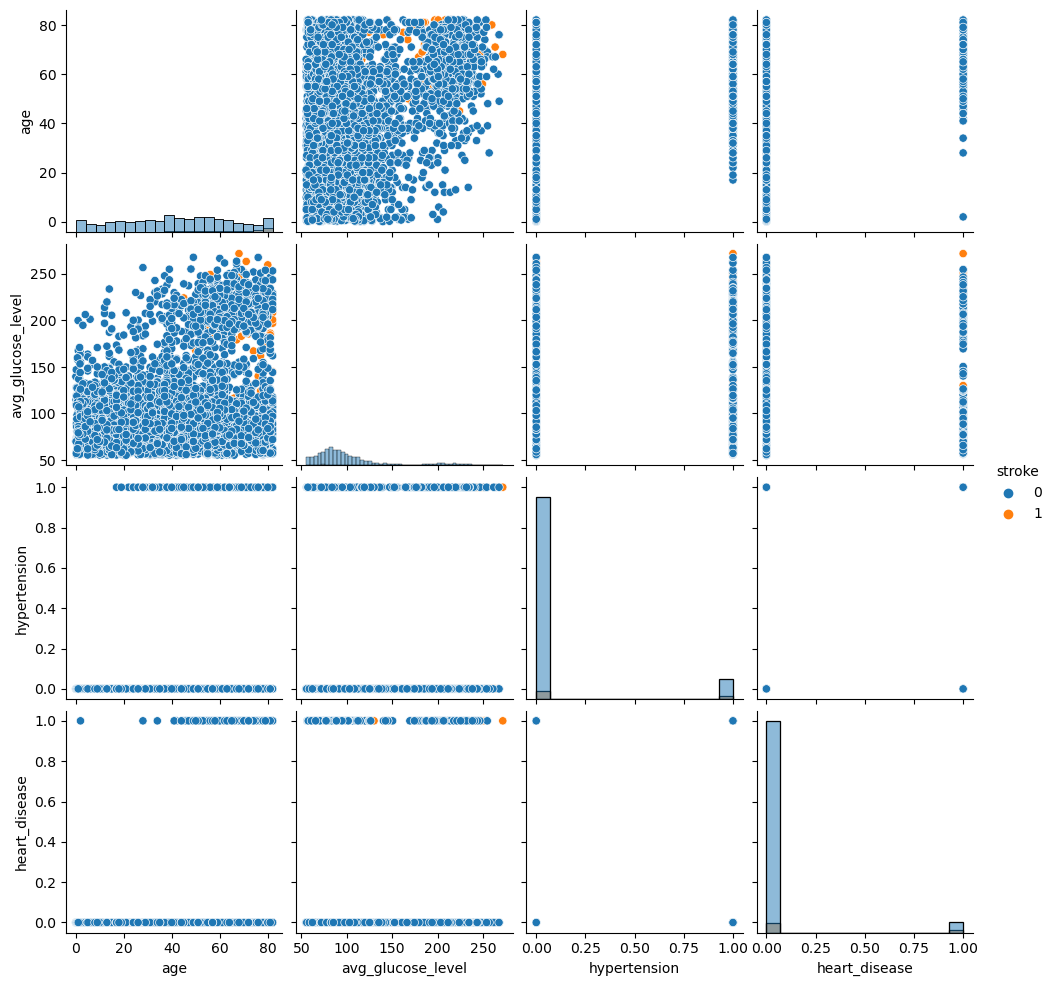


Correlation Matrix:


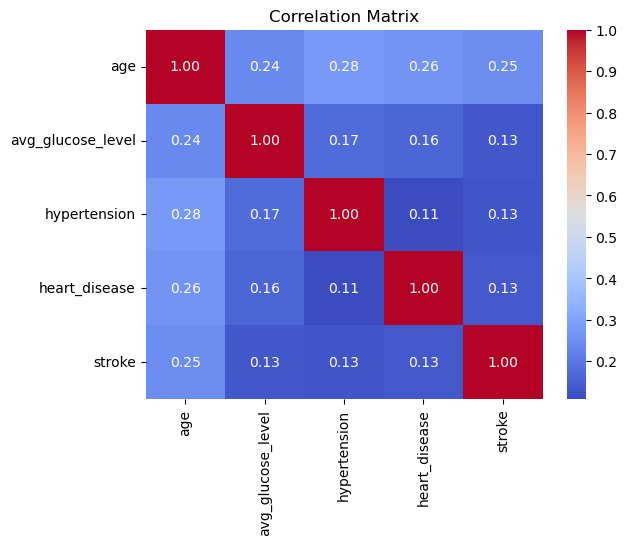

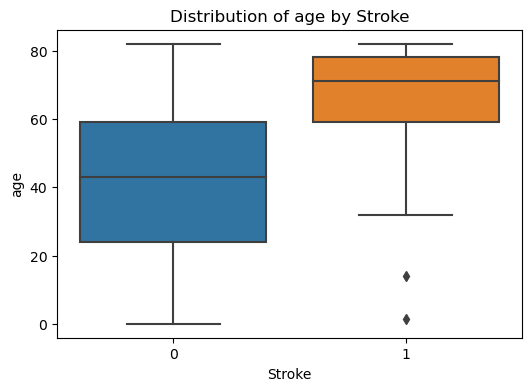

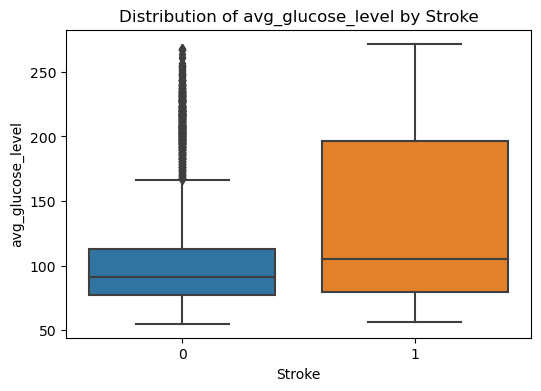

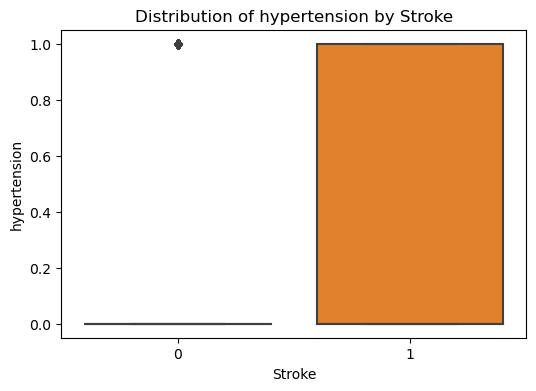

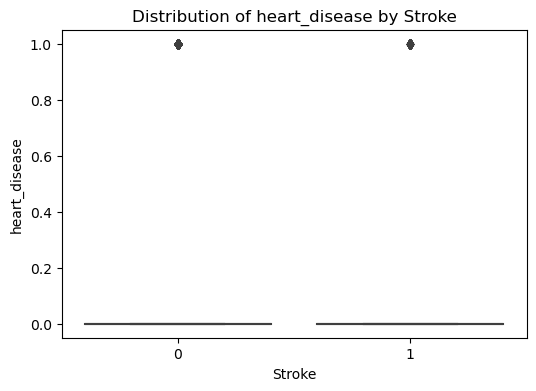

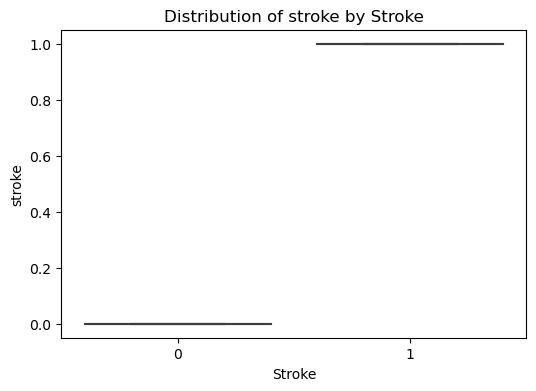


Feature Distribution:


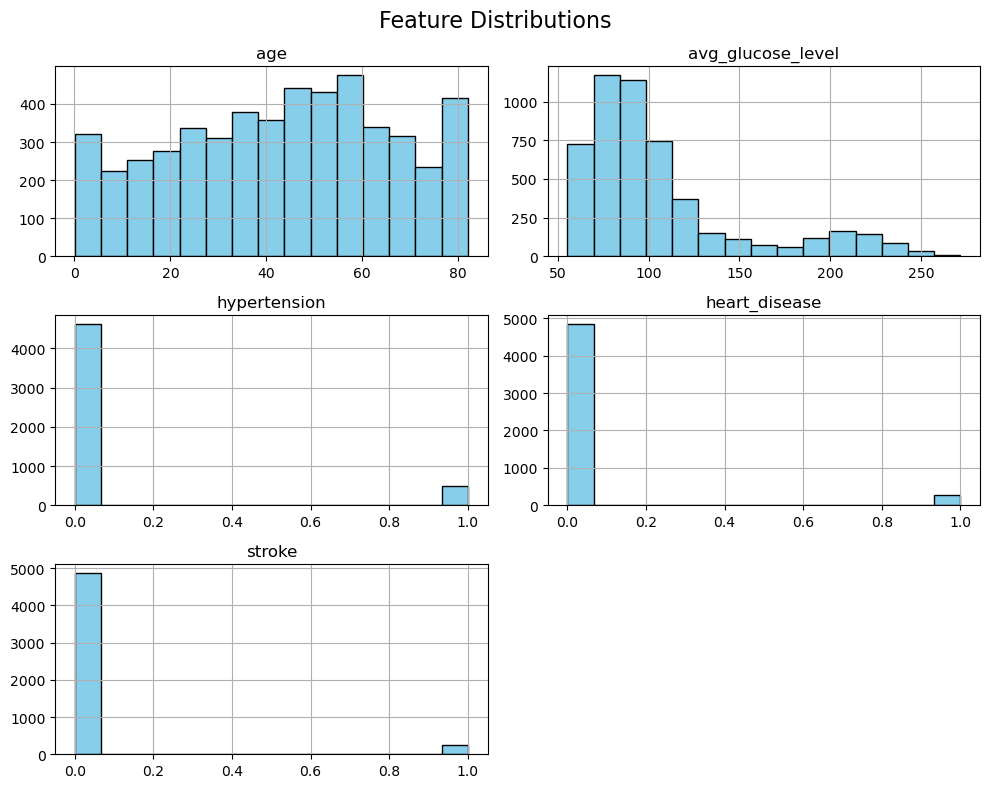

In [38]:
# Basic information about the dataset
print("\nDataset Info:")
stroke.info()

# Show missing values
missing_values = stroke.isnull().sum()
print("\nMissing Values:")
print(stroke.isnull().sum())

# Basic statistical summary
print("\nStatistical Summary:")
display(stroke.describe())

# Count the number of samples (stroke vs. no stroke)
print("\nStroke Class Count:")
print(stroke['stroke'].value_counts())

# VISUALIZATION
print("\nVISUALIZATION:")

# Pairplot to visualize relationships – important numerical features
print("\n🔗 Pairwise Relationships:")
selected_features = ['age', 'avg_glucose_level', 'hypertension', 'heart_disease', 'stroke']
sns.pairplot(df[selected_features].dropna(), hue='stroke', diag_kind='hist')
plt.show()

# Correlation matrix and heatmap
print("\nCorrelation Matrix:")
correlation_matrix = stroke[selected_features].dropna().corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for feature distribution by stroke class
features = ['age', 'avg_glucose_level', 'hypertension', 'heart_disease', 'stroke']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=feature, data=stroke)
    plt.title(f'Distribution of {feature} by Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(feature)
    plt.show()
    

# Histograms for each feature
print("\nFeature Distribution:")
stroke[features].hist(bins=15, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

#### Key Observations:
- There are **201** missing values in the **bmi** column.
- The **stroke** class is imbalanced with far more 0s (4,861) than 1s (249).
- Correlation between numeric features is weak, indicating independence.
- Older age and higher glucose levels may correlate with stroke.

## Data Preprocessing